In [ ]:
# Use all the resampling techniques, cross validation techniques & measure the accuracy using KNN Classifier. 
# Compare the accuracy with sampling data & without sampling data.

In [2]:
!pip install imblearn

                                              0.0/235.6 kB ? eta -:--:--
     -                                        10.2/235.6 kB ? eta -:--:--
     ----                                  30.7/235.6 kB 435.7 kB/s eta 0:00:01
     ----                                  30.7/235.6 kB 435.7 kB/s eta 0:00:01
     ----                                  30.7/235.6 kB 435.7 kB/s eta 0:00:01
     ---------                             61.4/235.6 kB 252.2 kB/s eta 0:00:01
     -----------                           71.7/235.6 kB 261.4 kB/s eta 0:00:01
     --------------                        92.2/235.6 kB 308.0 kB/s eta 0:00:01
     --------------                        92.2/235.6 kB 308.0 kB/s eta 0:00:01
     --------------                        92.2/235.6 kB 308.0 kB/s eta 0:00:01
     --------------                        92.2/235.6 kB 308.0 kB/s eta 0:00:01
     -----------------                    112.6/235.6 kB 218.3 kB/s eta 0:00:01
     ---------------------                143.4/235.6

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, LeaveOneOut, cross_val_score
import warnings
warnings.filterwarnings("ignore")

# Data Analysis

In [5]:
ps = pd.read_excel('new Churn.xlsx')
ps.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [6]:
ps.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
ps.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [8]:
ps.drop(['customerID'], axis=1,inplace=True)

In [9]:
ps.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
ps.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5282.0,0.513631,0.499861,0.00,0.00,1.0,1.00,1.0
SeniorCitizen,5282.0,0.159788,0.366444,0.00,0.00,0.0,0.00,1.0
Partner,5282.0,0.484476,0.499806,0.00,0.00,0.0,1.00,1.0
Dependents,5282.0,0.300265,0.458417,0.00,0.00,0.0,1.00,1.0
tenure,5282.0,32.413858,24.489220,0.00,9.00,29.0,55.00,72.0
PhoneService,5282.0,0.903635,0.295119,0.00,1.00,1.0,1.00,1.0
MultipleLines,5282.0,0.952480,0.949499,0.00,0.00,1.0,2.00,2.0
InternetService,5282.0,0.872586,0.738896,0.00,0.00,1.0,1.00,2.0
OnlineSecurity,5282.0,0.788716,0.859161,0.00,0.00,1.0,2.00,2.0
OnlineBackup,5282.0,0.915562,0.880724,0.00,0.00,1.0,2.00,2.0


<Axes: >

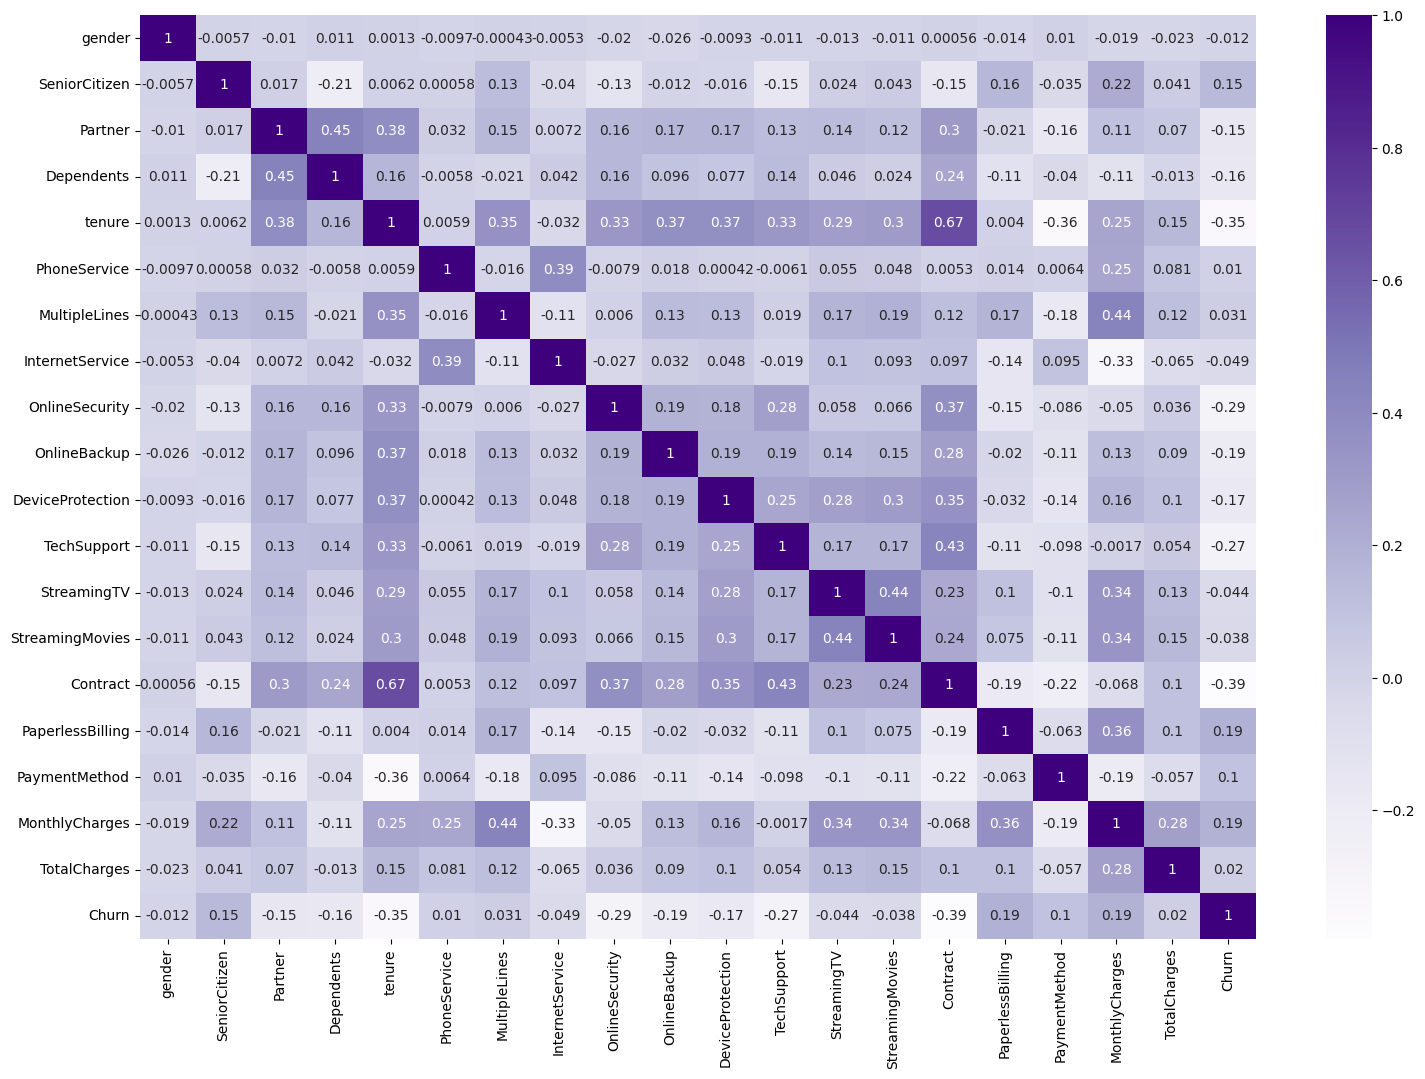

In [19]:
plt.figure(figsize=(18,12))
sb.heatmap(ps.corr(), annot=True, cmap="Purples")

# Churn

In [20]:
ps.Churn.value_counts()

Churn
0    3892
1    1390
Name: count, dtype: int64

In [22]:
1385/(3880+1385)

0.2630579297245964

<Axes: xlabel='Churn', ylabel='count'>

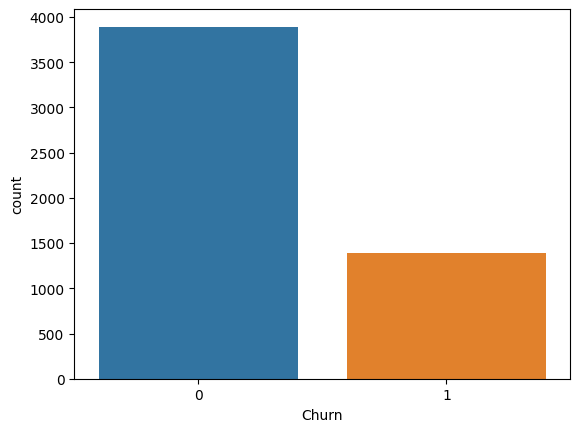

In [24]:
sb.countplot(x='Churn', data=ps)

<Axes: xlabel='Partner', ylabel='count'>

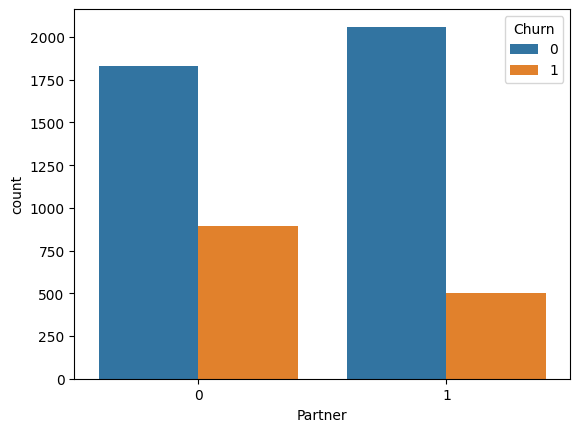

In [26]:
sb.countplot(x='Partner',hue='Churn',data=ps)

# Resampling

In [27]:
p = ps.drop('Churn',axis=1)
s = ps['Churn']

In [28]:
s.value_counts()

Churn
0    3892
1    1390
Name: count, dtype: int64

In [29]:
def printSmapleCount(Data):
    print(pd.concat([
    pd.Series(s.value_counts(), name='before'),
    pd.Series(Data.value_counts(), name='after')],
    axis=1).reset_index())

# Synthetic Minority Oversampling Technique (SMOTE)

In [30]:
smot = SMOTETomek(random_state=46)

In [31]:
p1,s1 = smot.fit_resample(p,s)

In [32]:
printSmapleCount(s1)

   Churn  before  after
0      0    3892   3571
1      1    1390   3571


# Under sampling (Near Miss)

In [40]:
nm = NearMiss()

In [36]:
p2,s2 = nm.fit_resample(p,s)

In [37]:
printSmapleCount(s2)

   Churn  before  after
0      0    3892   1390
1      1    1390   1390


# Over Sampling

In [38]:
os = RandomOverSampler(random_state=46)

In [41]:
p3,s3 = os.fit_resample(p,s)

In [42]:
printSmapleCount(s3)

   Churn  before  after
0      0    3892   3892
1      1    1390   3892


# K-nearest neighbors (KNN)

Previously (Before Resampling)

In [43]:
ptrain, ptest, strain, stest = tts(p, s, test_size=0.3, random_state=46)

In [44]:
knnc1 = KNeighborsClassifier(n_neighbors=9)
knnc1.fit(ptrain, strain)

KNeighborsClassifier(n_neighbors=9)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [45]:
knnc1.score(ptest,stest)

0.7583596214511041

Afterwards (After Resampling)

In [46]:
ptrain2, ptest2, strain2, stest2 = tts(p2, s2, test_size=0.3, random_state=46)

In [47]:
knnc2 = KNeighborsClassifier(n_neighbors=9)
knnc2.fit(ptrain2, strain2)

KNeighborsClassifier(n_neighbors=9)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [48]:
knnc2.score(ptest2,stest2)

0.5827338129496403

# Cross Validations

K-Fold Cross Validation

In [51]:
kfcv = cross_val_score(knnc2, p2, s2, cv=KFold())

In [52]:
kfcv.min(), kfcv.max(), kfcv.mean()

(0.19424460431654678, 0.5881294964028777, 0.34928057553956837)

Stratified K Fold Cross Validation

In [54]:
skfcv = cross_val_score(knnc2, p2, s2, cv=StratifiedKFold())

In [55]:
skfcv.min(), skfcv.max(), skfcv.mean()

(0.4226618705035971, 0.5827338129496403, 0.5417266187050359)

Leave One-Out Cross Validation

In [56]:
loocv = cross_val_score(knnc2, p2, s2, cv=LeaveOneOut())

In [58]:
loocv.min(), loocv.max(), loocv.mean()

(0.0, 1.0, 0.5888489208633093)